<h1>Lecture 7, October 20, 2025 </h1>

<h1> Forecasting VAR models</h1>

Marta Boczon

Department of Economics

Copnehagen Business School

mbo.eco@cbs.dk

In [23]:
#install.packages("quantmod")
#install.packages("fredr")
#install.packages("ggfortify")
#install.packages('urca')
#install.packages("dynlm")
#install.packages("stargazer")
#install.packages("pracma")
#install.packages("dLagM")
#install.packages("gets")
#install.packages("car")
#install.packages("lmtest")
#install.packages("vars")
options(warn=-1)

<div style="background-color:#e6f2ff; padding:15px; border-radius:5px;">

<h2>Roadmap</h2>

<p>
Today’s lecture will follow an <b>exercise-based format</b> designed to combine theory, coding, and interpretation in a hands-on way.<br>
We’ll complete <b>five structured exercises</b>, each taking approximately <b>20 minutes</b>, followed by a short <b>discussion and debrief</b>.
</p>

<h3>Goal for today</h3>
<ul>
  <li>Revisit and reinforce what we did <b>last week</b> (lag selection, identification, interpretation).</li>
</ul>

<h3>Expected outcomes</h3>
<p>By the end of the session, you should be able to:</p>
<ul>
  <li>Prepare macroeconomic time series for VAR analysis.</li>
  <li>Estimate both reduced-form VARs and identified SVARs.</li>
  <li>Generate and interpret <b>impulse response functions (IRFs)</b>.</li>
</ul>

</div>


In [2]:
# Import the dataset from a CSV file downloaded from FRED
cpi = read.csv("CPIAUCSL.csv")
urate = read.csv("UNRATE.csv")

# Display the first few observations to data check stzructure
head(cpi)
head(urate)

# Display the last few observations to data check structure
tail(cpi)
tail(urate)

# Convert the second column of the dataset into a time series object
# Exclude the last observation because the most recent value is "Pending" (NA after import)
tscpi = ts(cpi[1:(nrow(cpi)-1), 2], frequency = 4, start = c(1947, 1))
tsurate = ts(urate[1:(nrow(urate)-1), 2], frequency = 4, start = c(1948, 1))

# Define inflation
tsinf = diff(log(tscpi)) * 100

# Inflation is stationary in levels
dinf = tsinf

# Unemployment rate is stationary in levels
durate = tsurate

,observation_date,CPIAUCSL
,<chr>,<dbl>
1,1947-01-01,21.700
2,1947-04-01,22.010
3,1947-07-01,22.490
4,1947-10-01,23.127
5,1948-01-01,23.617
6,1948-04-01,23.993


,observation_date,UNRATE
,<chr>,<dbl>
1,1948-01-01,3.7
2,1948-04-01,3.7
3,1948-07-01,3.8
4,1948-10-01,3.8
5,1949-01-01,4.7
6,1949-04-01,5.9


,observation_date,CPIAUCSL
,<chr>,<dbl>
310,2024-04-01,313.096
311,2024-07-01,314.183
312,2024-10-01,316.539
313,2025-01-01,319.492
314,2025-04-01,320.800
315,2025-07-01,NA


,observation_date,UNRATE
,<chr>,<dbl>
306,2024-04-01,4.0
307,2024-07-01,4.2
308,2024-10-01,4.1
309,2025-01-01,4.1
310,2025-04-01,4.2
311,2025-07-01,NA


<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">  

<h2>Exercise 1 (15')</h2>
<p>For US real GDP:</p>
<ol>
  <li>Import the data.</li>
  <li>Test for a unit root.</li>
  <li>If necessary, transform it into a stationary series.</li>
</ol>
    
</div>


<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">  

<h2>Solution to Exercise 1</h2>
    
</div>    

In [3]:
# Import the dataset from a CSV file downloaded from FRED
gdp = read.csv("GDPC1.csv")

# Display the first few observations to data check stzructure
head(gdp)

# Display the last few observations to data check structure
tail(gdp)

# Convert the second column of the dataset into a time series object
tsgdp = ts(gdp[, 2], frequency = 4, start = c(1947, 1))

,observation_date,GDPC1
,<chr>,<dbl>
1,1947-01-01,2182.681
2,1947-04-01,2176.892
3,1947-07-01,2172.432
4,1947-10-01,2206.452
5,1948-01-01,2239.682
6,1948-04-01,2276.690


,observation_date,GDPC1
,<chr>,<dbl>
309,2024-01-01,23082.12
310,2024-04-01,23286.51
311,2024-07-01,23478.57
312,2024-10-01,23586.54
313,2025-01-01,23548.21
314,2025-04-01,23770.98


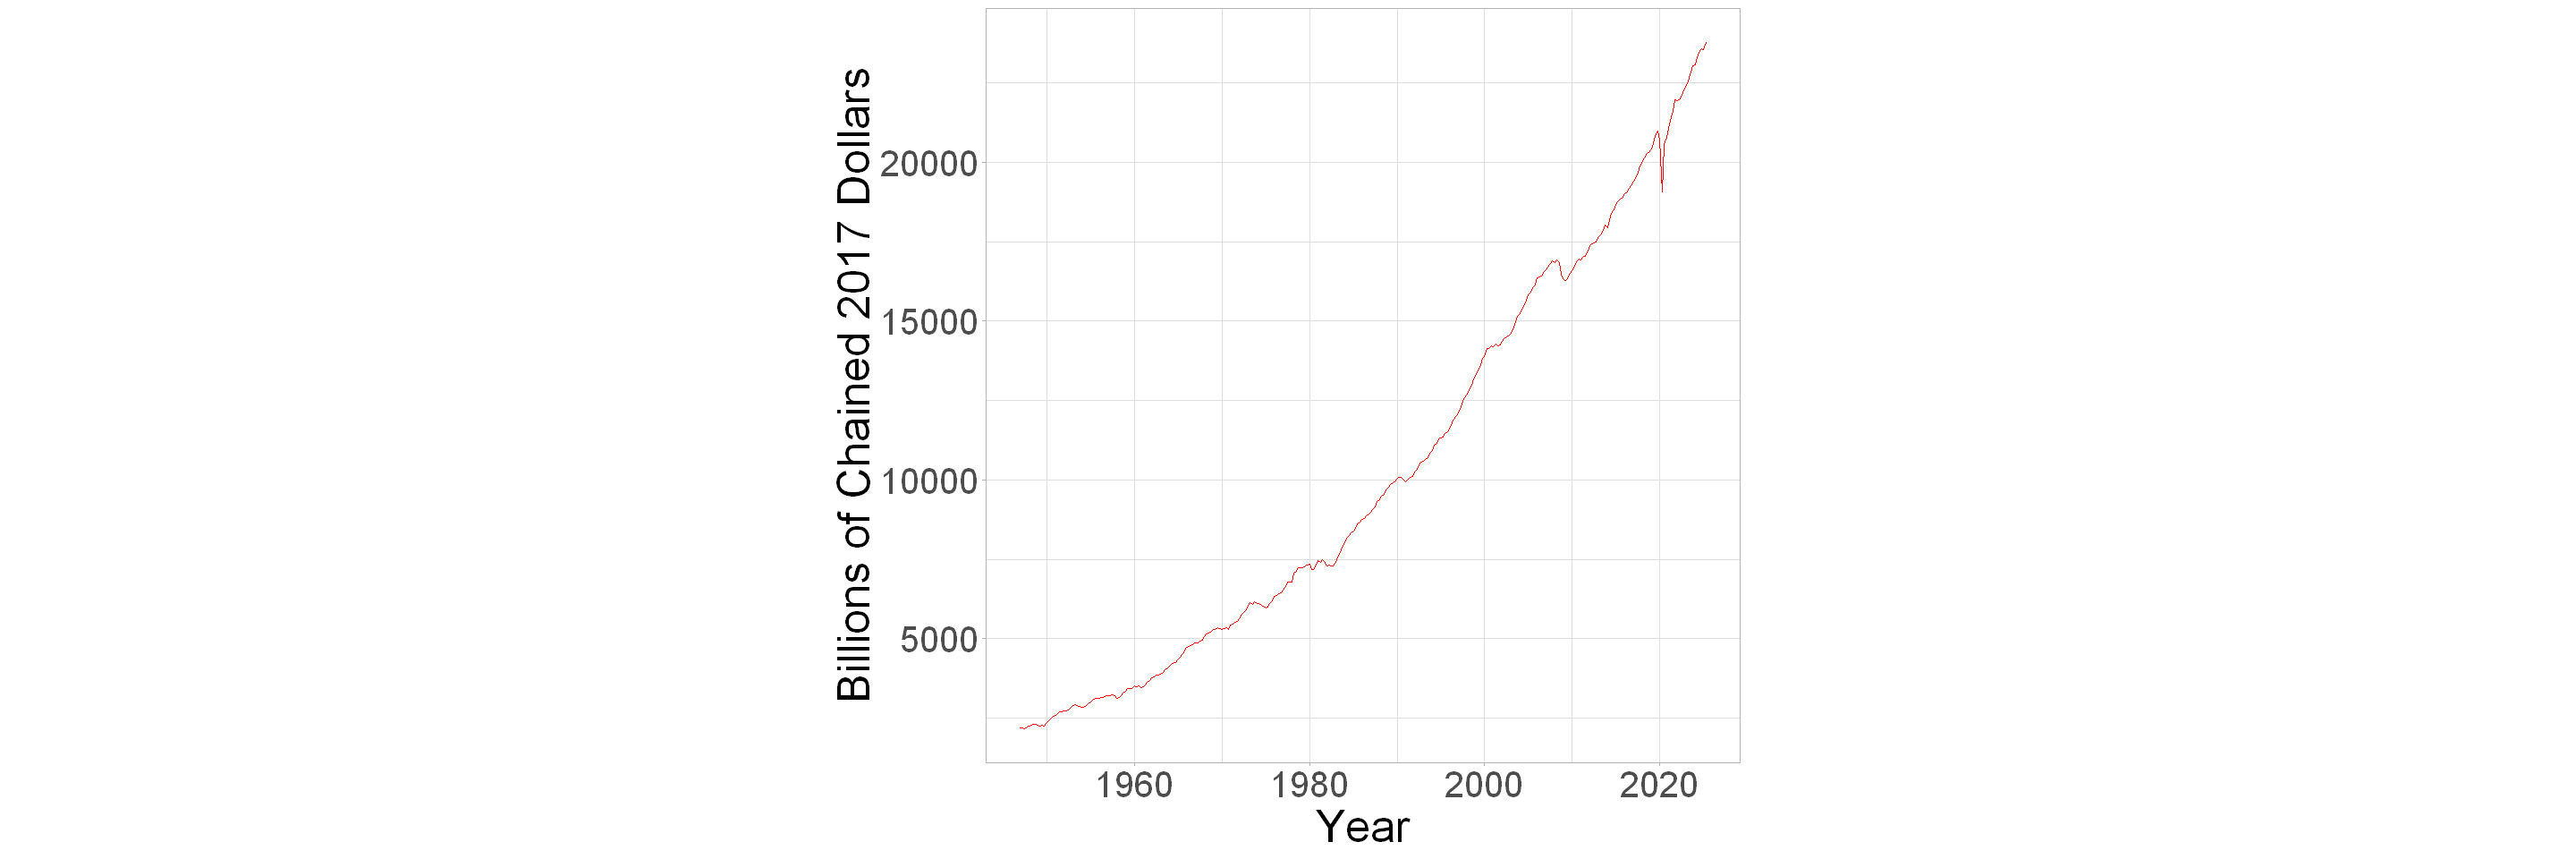

In [4]:
# Load required libraries
library(ggplot2)   # for plotting
library(ggfortify) # for autoplot of time series objects

# Set default figure size (width = 24, height = 8)
options(repr.plot.width = 24, repr.plot.height = 8)

# Create an initial time series plot of tspce in red
fig = autoplot(tsgdp, colour = 'red')

# Customize the plot
fig = fig +
  theme(aspect.ratio = 1) +                      # make plot square-shaped
  theme_light() +                                # use a light theme
  theme(aspect.ratio = 1) +                      # reinforce square aspect ratio
  theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) + # adjust margins
  theme(text = element_text(size = 30)) +        # set large font size for readability
  labs(x = "Year") +                             # label x-axis
  labs(y = "Billions of Chained 2017 Dollars")   # label y-axis

# Display the plot
fig

In [5]:
library(urca)
summary(ur.df(tsgdp, type='trend', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1797.63   -32.40     3.44    46.24  1107.13 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 16.194420  18.513223   0.875   0.3824  
z.lag.1     -0.004476   0.007428  -0.603   0.5472  
tt           0.690343   0.521043   1.325   0.1862  
z.diff.lag  -0.147127   0.057156  -2.574   0.0105 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 148.1 on 301 degrees of freedom
Multiple R-squared:  0.05995,	Adjusted R-squared:  0.05058 
F-statistic: 6.399 on 3 and 301 DF,  p-value: 0.0003245


Value of test-statistic is: -0.6026 28.452 7.7571 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.98 -3.42 -3.13
phi2  6.1

<div style="background-color:lightyellow; padding:15px; border-radius:5px;">

<h3>ADF Test Interpretation</h3>

<p><b>Test statistics:</b><br>
<span style="font-family: 'Times New Roman', serif;">τ<sub>3</sub> = −0.6026</span>, 
<span style="font-family: 'Times New Roman', serif;">φ<sub>2</sub> = 28.452</span>, 
<span style="font-family: 'Times New Roman', serif;">φ<sub>3</sub> = 7.7571</span></p>

<p><b>Critical values:</b></p>

<table style="border-collapse: collapse; margin-left: 20px;">
  <tr>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">Significance</th>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">1%</th>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">5%</th>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">10%</th>
  </tr>
  <tr>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">τ<sub>3</sub></td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">−3.98</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">−3.42</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">−3.13</td>
  </tr>
  <tr>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">φ<sub>2</sub></td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">6.15</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">4.71</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">4.05</td>
  </tr>
  <tr>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">φ<sub>3</sub></td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">8.34</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">6.30</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">5.36</td>
  </tr>
</table>

<p><b>Interpretation:</b></p>
<ul>
  <li>We <b>reject the null hypothesis</b> that both the <b>constant and deterministic trend are zero</b>, because <span style="font-family: 'Times New Roman', serif;">φ<sub>2</sub> = 28.452 &gt; 6.15</span>.</li>
  <li>However, at the <b>1% significance level</b>, we <b>cannot reject</b> that the <b>deterministic trend is zero</b> since <span style="font-family: 'Times New Roman', serif;">φ<sub>3</sub> = 7.7571 &lt; 8.34</span>.</li>
  <li>Therefore, we <b>retest with type = "drift"</b>, assuming the series has a constant but no trend.</li>
</ul>

</div>


In [6]:
library(urca)
summary(ur.df(tsgdp, type='drift', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1807.16   -34.67     5.05    46.78  1110.02 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.003256  16.639597   1.623 0.105669    
z.lag.1      0.005190   0.001401   3.705 0.000252 ***
z.diff.lag  -0.150104   0.057183  -2.625 0.009107 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 148.3 on 302 degrees of freedom
Multiple R-squared:  0.05447,	Adjusted R-squared:  0.04821 
F-statistic: 8.699 on 2 and 302 DF,  p-value: 0.0002123


Value of test-statistic is: 3.7046 41.696 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79


<div style="background-color:lightyellow; padding:15px; border-radius:5px;">

<h3>ADF Test Interpretation (drift case)</h3>

<p><b>Test statistics:</b><br>
<span style="font-family: 'Times New Roman', serif;">τ<sub>2</sub> = 3.7046</span>, 
<span style="font-family: 'Times New Roman', serif;">φ<sub>1</sub> = 41.696</span></p>

<p><b>Critical values:</b></p>

<table style="border-collapse: collapse; margin-left: 20px;">
  <tr>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">Significance</th>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">1%</th>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">5%</th>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">10%</th>
  </tr>
  <tr>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">τ<sub>2</sub></td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">−3.44</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">−2.87</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">−2.57</td>
  </tr>
  <tr>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">φ<sub>1</sub></td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">6.47</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">4.61</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">3.79</td>
  </tr>
</table>

<p><b>Interpretation:</b></p>
<ul>
  <li><b>Deterministic term:</b> Since <span style="font-family: 'Times New Roman', serif;">φ<sub>1</sub> = 41.696</span> exceeds its critical values, we <b>reject</b> the null that the <b>constant (drift) is zero</b> → the model <b>should include a constant</b> (specification with drift is correct).</li>
  <li><b>Unit root:</b> The ADF statistic <span style="font-family: 'Times New Roman', serif;">τ<sub>2</sub> = 3.7046</span> is <b>not more negative</b> than the critical values, so we <b>cannot reject</b> the <b>unit root</b> null at conventional levels.</li>
</ul>

</div>


In [7]:
# Take the first difference of log(GDP) to obtain the growth rate (stationary series)
dgdp = diff(log(tsgdp))

In [8]:
library(urca)
summary(ur.df(dgdp, type='drift', lags=8, selectlags="AIC"))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.087406 -0.004101 -0.000198  0.004367  0.078958 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0061336  0.0008576   7.152 6.52e-12 ***
z.lag.1     -0.7897137  0.0754362 -10.469  < 2e-16 ***
z.diff.lag  -0.1005670  0.0570089  -1.764   0.0787 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01101 on 301 degrees of freedom
Multiple R-squared:  0.4452,	Adjusted R-squared:  0.4415 
F-statistic: 120.8 on 2 and 301 DF,  p-value: < 2.2e-16


Value of test-statistic is: -10.4686 54.801 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79


<div style="background-color:lightyellow; padding:15px; border-radius:5px;">

<h3>ADF Test Interpretation (first difference)</h3>

<p><b>Test statistics:</b><br>
<span style="font-family: 'Times New Roman', serif;">τ<sub>2</sub> = −10.4686</span>, 
<span style="font-family: 'Times New Roman', serif;">φ<sub>1</sub> = 54.801</span></p>

<p><b>Critical values:</b></p>

<table style="border-collapse: collapse; margin-left: 20px;">
  <tr>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">Significance</th>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">1%</th>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">5%</th>
    <th style="border: 1px solid #999; padding: 4px 10px; text-align: center;">10%</th>
  </tr>
  <tr>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">τ<sub>2</sub></td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">−3.44</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">−2.87</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">−2.57</td>
  </tr>
  <tr>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">φ<sub>1</sub></td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">6.47</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">4.61</td>
    <td style="border: 1px solid #999; padding: 4px 10px; text-align: center;">3.79</td>
  </tr>
</table>

<p><b>Interpretation:</b></p>
<ul>
  <li><b>Deterministic term:</b> Since <span style="font-family: 'Times New Roman', serif;">φ<sub>1</sub> = 54.801</span> is much larger than its critical values, we <b>reject</b> the null that the <b>constant (drift) is zero</b> → the drift specification remains appropriate.</li>
  <li><b>Unit root:</b> The ADF statistic <span style="font-family: 'Times New Roman', serif;">τ<sub>2</sub> = −10.4686</span> is far <b>below</b> the critical values, so we <b>reject</b> the null hypothesis of a <b>unit root</b>.</li>
  <li>Therefore, the series is <b>stationary after first differencing</b>, indicating there is <b>no second unit root</b>.</li>
</ul>

</div>
   

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
<h2>Exercise 2 (15')</h2>

<p>Consider two reduced-form VAR models:</p>
<ol type="i">
  <li type="i">a two-variable system of real GDP and the unemployment rate in the US;</li>
  <li type="i">a three-variable system of real GDP, inflation, and the unemployment rate in the US.</li>
</ol>

<p>For each system:</p>
<ol>
  <li>Create a joint time-series object and report the number of observations.</li>
    <li> Use AIC to determine the optimal number of lags. </li>
  <li>Write out the full system of equations assuming 2 lags for 2 variable system, and 3 lags for three variable system.</li>
    <li> Rerwrite the system using matrices.</li>  
  <li>Compute the total number of parameters to be estimated.</li>
</ol>
</div>


<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">  

<h2>Solution to Exercise 2</h2>
    
</div>    

In [9]:
# Align series on common dates (keep only overlapping periods)
data2 = ts.intersect(dgdp, durate)           # 2-variable system
data3 = ts.intersect(dgdp, durate, dinf)     # 3-variable system

# Number of overlapping observations in each system
nrow(data2)
nrow(data3)

[1] 310

[1] 310

In [10]:
head(data2)

dgdp,durate
0.014948096,3.7
0.016388742,3.7
0.005728742,3.8
0.001132224,3.8
-0.013861770,4.7
-0.003402356,5.9


In [11]:
head(data3)

dgdp,durate,dinf
0.014948096,3.7,2.0966026
0.016388742,3.7,1.5795329
0.005728742,3.8,1.6698053
0.001132224,3.8,-0.9223866
-0.013861770,4.7,-0.9560302
-0.003402356,5.9,-0.1086502


<div style="background-color:lightyellow; padding:10px; border-radius:5px;">
 
Each system contains 310 observations.
    
</div>    

In [24]:
library(vars)

out = VARselect(data2, lag.max = 8, type = "const")
out$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      2      2

<div style="background-color:lightyellow; padding:10px; border-radius:5px;">
 
According to AIC, the two-variable system should be estimated on <b>two</b> lags since AIC(n):2
    
</div>  

In [13]:
library(vars)

out = VARselect(data3, lag.max = 8, type = "const")
out$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      2      1      3

<div style="background-color:lightyellow; padding:10px; border-radius:5px;">
 
According to AIC, the three-variable system should be estimated on <b>three</b> lags since AIC(n):3
    
</div>  

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
 
<h2>VAR(2) with two variables (GDP growth and unemployment)</h2>

<b>Equation-by-equation form (2 lags):</b>
$$
dgdp_t \;=\; c_1
+ \phi_{11,1}\, dgdp_{t-1} + \phi_{12,1}\, durate_{t-1}
+ \phi_{11,2}\, dgdp_{t-2} + \phi_{12,2}\, durate_{t-2}
+ u_{1t},
$$

$$
durate_t \;=\; c_2
+ \phi_{21,1}\, dgdp_{t-1} + \phi_{22,1}\, durate_{t-1}
+ \phi_{21,2}\, dgdp_{t-2} + \phi_{22,2}\, durate_{t-2}
+ u_{2t}.
$$

<b>Matrix form:</b>
$$
\begin{bmatrix}
dgdp_t \\[2pt] durate_t
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\[2pt] c_2
\end{bmatrix}
+
A_1
\begin{bmatrix}
dgdp_{t-1} \\[2pt] durate_{t-1}
\end{bmatrix}
+
A_2
\begin{bmatrix}
dgdp_{t-2} \\[2pt] durate_{t-2}
\end{bmatrix}
+
\begin{bmatrix}
u_{1t} \\[2pt] u_{2t}
\end{bmatrix},
\quad
A_j =
\begin{bmatrix}
\phi_{11,j} & \phi_{12,j} \\
\phi_{21,j} & \phi_{22,j}
\end{bmatrix},\; j=1,2.
$$

<b>Parameter count:</b>  
Per equation: $k p + 1 = 2\times2 + 1 = 5$ → Total across 2 equations: <b>10</b> plus <b>3</b> free parameters in $\Sigma_u$, where 

$
\Sigma_u \;=\; \mathrm{Var}(u_t) \;=\;
\begin{bmatrix}
\sigma_{11} & \sigma_{12} \\
\sigma_{12} & \sigma_{22}
\end{bmatrix},
$
    
so <b>13</b> parameters.
</div>    

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">

<h2>VAR(3) with three variables (GDP growth,unemployment, inflation)</h2>

<b>Equation-by-equation form (3 lags):</b>

\begin{aligned}
dgdp_t \;=\;& c_1
+ \phi_{11,1}\,dgdp_{t-1} + \phi_{12,1}\,durate_{t-1} + \phi_{13,1}\,dinf_{t-1} \\
&+ \phi_{11,2}\,dgdp_{t-2} + \phi_{12,2}\,durate_{t-2} + \phi_{13,2}\,dinf_{t-2} \\
&+ \phi_{11,3}\,dgdp_{t-3} + \phi_{12,3}\,durate_{t-3} + \phi_{13,3}\,dinf_{t-3}
+ u_{1t},
\\[6pt]
durate_t \;=\;& c_2
+ \phi_{21,1}\,dgdp_{t-1} + \phi_{22,1}\,durate_{t-1} + \phi_{23,1}\,dinf_{t-1} \\
&+ \phi_{21,2}\,dgdp_{t-2} + \phi_{22,2}\,durate_{t-2} + \phi_{23,2}\,dinf_{t-2} \\
&+ \phi_{21,3}\,dgdp_{t-3} + \phi_{22,3}\,durate_{t-3} + \phi_{23,3}\,dinf_{t-3}
+ u_{2t},
\\[6pt]
dinf_t \;=\;& c_3
+ \phi_{31,1}\,dgdp_{t-1} + \phi_{32,1}\,durate_{t-1} + \phi_{33,1}\,dinf_{t-1} \\
&+ \phi_{31,2}\,dgdp_{t-2} + \phi_{32,2}\,durate_{t-2} + \phi_{33,2}\,dinf_{t-2} \\
&+ \phi_{31,3}\,dgdp_{t-3} + \phi_{32,3}\,durate_{t-3} + \phi_{33,3}\,dinf_{t-3}
+ u_{3t}.
\end{aligned}



<b>Matrix form:</b>
$$
\begin{bmatrix}
dgdp_t \\[2pt] durate_t \\[2pt] dinf_t 
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\[2pt] c_2 \\[2pt] c_3
\end{bmatrix}
+
A_1
\begin{bmatrix}
dgdp_{t-1} \\[2pt]  durate_{t-1}\\[2pt]  dinf_{t-1}
\end{bmatrix}
+
A_2
\begin{bmatrix}
dgdp_{t-2} \\[2pt] durate_{t-2} \\[2pt]  dinf_{t-2}
\end{bmatrix}
+
A_3
\begin{bmatrix}
dgdp_{t-3} \\[2pt] durate_{t-3}  \\[2pt] dinf_{t-3}
\end{bmatrix}
+
\begin{bmatrix}
u_{1t} \\[2pt] u_{2t} \\[2pt] u_{3t}
\end{bmatrix},
\quad
A_j =
\begin{bmatrix}
\phi_{11,j} & \phi_{12,j} & \phi_{13,j} \\
\phi_{21,j} & \phi_{22,j} & \phi_{23,j} \\
\phi_{31,j} & \phi_{32,j} & \phi_{33,j}
\end{bmatrix},\; j=1,2,3.
$$

<b>Parameter count:</b> 
Per equation: $k p + 1 = 3\times 3 + 1 = 10$.  
Across 3 equations: <b>30</b> regression parameters, plus <b>6</b> free parameters in the $3\times3$ covariance matrix $\Sigma_u$, where
    
$
\Sigma_u \;=\; \operatorname{Var}(u_t) \;=\;
\begin{bmatrix}
\sigma_{11} & \sigma_{12} & \sigma_{13} \\
\sigma_{12} & \sigma_{22} & \sigma_{23} \\
\sigma_{13} & \sigma_{23} & \sigma_{33}
\end{bmatrix},
$

so <b>36</b> parameters.
</div>


<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
  <h2>Exercise 3 (15')</h2>

  <p>Building on Exercise 2, in which you determined the optimal lag length for a reduced-form VAR, do the following for each system:</p>
  <ol>
    <li>Rewrite the model in structural form as a system of equations.</li>
    <li>Rewrite the model in matrix form.</li>
    <li>Count the total number of parameters in the structural form (intercepts, contemporaneous matrix, and lag matrices).</li>
  </ol>
</div>

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
    
<h2>Solution to Exercise 3</h2>
</div>

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">

<h2>SVAR(2) with two variables (GDP growth and unemployment)</h2>

<b>Equation-by-equation form (2 lags):</b>

$$
a_{11}\,dgdp_t + a_{12}\,durate_t
= \alpha_1
+ \beta_{11,1}\,dgdp_{t-1} + \beta_{12,1}\,durate_{t-1}
+ \beta_{11,2}\,dgdp_{t-2} + \beta_{12,2}\,durate_{t-2}
+ b_{11}\,\varepsilon_{1t} + b_{12}\,\varepsilon_{2t}.
$$

$$
a_{21}\,dgdp_t + a_{22}\,durate_t
= \alpha_2
+ \beta_{21,1}\,dgdp_{t-1} + \beta_{22,1}\,durate_{t-1}
+ \beta_{21,2}\,dgdp_{t-2} + \beta_{22,2}\,durate_{t-2}
+ b_{21}\,\varepsilon_{1t} + b_{22}\,\varepsilon_{2t}.
$$

<b>Matrix form:</b>
$$
A
\begin{bmatrix}
dgdp_t \\[2pt] durate_t
\end{bmatrix}
=
\begin{bmatrix}
\alpha_1 \\[2pt] \alpha_2
\end{bmatrix}
+
A_1
\begin{bmatrix}
dgdp_{t-1} \\[2pt] durate_{t-1}
\end{bmatrix}
+
A_2
\begin{bmatrix}
dgdp_{t-2} \\[2pt] durate_{t-2}
\end{bmatrix}
+B
\begin{bmatrix}
\varepsilon_{1t} \\[2pt] \varepsilon_{2t}
\end{bmatrix}$$
    
where
    
$$
A =
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix},
\quad
A_j =
\begin{bmatrix}
\beta_{11,j} & \beta_{12,j} \\
\beta_{21,j} & \beta_{22,j}
\end{bmatrix},\; j=1,2,
\quad
B =
\begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix}.
$$

Number of strucutral unknowns: <b>18</b>.
 
</div>



<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">

<h2>SVAR(3) with three variables (GDP growth, unemployment, and inflation)</h2>

<b>Equation-by-equation form (3 lags):</b>

\begin{align*}
a_{11}\,dgdp_t + a_{12}\,durate_t + a_{13}\,dinf_t
&= \alpha_1
+ \beta_{11,1}\,dgdp_{t-1} + \beta_{12,1}\,durate_{t-1} + \beta_{13,1}\,dinf_{t-1} \\
&+ \beta_{11,2}\,dgdp_{t-2} + \beta_{12,2}\,durate_{t-2} + \beta_{13,2}\,dinf_{t-2}\\
&+ \beta_{11,3}\,dgdp_{t-3} + \beta_{12,3}\,durate_{t-3} + \beta_{13,3}\,dinf_{t-3} \\
&+ b_{11}\,\varepsilon_{1t} + b_{12}\,\varepsilon_{2t} + b_{13}\,\varepsilon_{3t}.
\end{align*}

\begin{align*}
a_{21}\,dgdp_t + a_{22}\,durate_t + a_{23}\,dinf_t
&= \alpha_2
+ \beta_{21,1}\,dgdp_{t-1} + \beta_{22,1}\,durate_{t-1} + \beta_{23,1}\,dinf_{t-1}\\
&+ \beta_{21,2}\,dgdp_{t-2} + \beta_{22,2}\,durate_{t-2} + \beta_{23,2}\,dinf_{t-2}\\
&+ \beta_{21,3}\,dgdp_{t-3} + \beta_{22,3}\,durate_{t-3} + \beta_{23,3}\,dinf_{t-3}\\
&+ b_{21}\,\varepsilon_{1t} + b_{22}\,\varepsilon_{2t} + b_{23}\,\varepsilon_{3t}.
\end{align*}

\begin{align*}
a_{31}\,dgdp_t + a_{32}\,durate_t + a_{33}\,dinf_t
&= \alpha_3
+ \beta_{31,1}\,dgdp_{t-1} + \beta_{32,1}\,durate_{t-1} + \beta_{33,1}\,dinf_{t-1}\\
&+ \beta_{31,2}\,dgdp_{t-2} + \beta_{32,2}\,durate_{t-2} + \beta_{33,2}\,dinf_{t-2}\\
&+ \beta_{31,3}\,dgdp_{t-3} + \beta_{32,3}\,durate_{t-3} + \beta_{33,3}\,dinf_{t-3}\\
&+ b_{31}\,\varepsilon_{1t} + b_{32}\,\varepsilon_{2t} + b_{33}\,\varepsilon_{3t}.
\end{align*}

<b>Matrix form:</b>
$$
A
\begin{bmatrix}
dgdp_t \\[2pt] durate_t \\[2pt] dinf_t
\end{bmatrix}
=
\begin{bmatrix}
\alpha_1 \\[2pt] \alpha_2 \\[2pt] \alpha_3
\end{bmatrix}
+
A_1
\begin{bmatrix}
dgdp_{t-1} \\[2pt] durate_{t-1} \\[2pt] dinf_{t-1}
\end{bmatrix}
+
A_2
\begin{bmatrix}
dgdp_{t-2} \\[2pt] durate_{t-2} \\[2pt] dinf_{t-2}
\end{bmatrix}
+
A_3
\begin{bmatrix}
dgdp_{t-3} \\[2pt] durate_{t-3} \\[2pt] dinf_{t-3}
\end{bmatrix}
+
B
\begin{bmatrix}
\varepsilon_{1t} \\[2pt] \varepsilon_{2t} \\[2pt] \varepsilon_{3t}
\end{bmatrix}
$$
    
where
    
$$
A =
\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{bmatrix},
\quad
A_j =
\begin{bmatrix}
\beta_{11,j} & \beta_{12,j} & \beta_{13,j} \\
\beta_{21,j} & \beta_{22,j} & \beta_{23,j} \\
\beta_{31,j} & \beta_{32,j} & \beta_{33,j}
\end{bmatrix},\; j=1,2,3,
\quad
B =
\begin{bmatrix}
b_{11} & b_{12} & b_{13} \\
b_{21} & b_{22} & b_{23} \\
b_{31} & b_{32} & b_{33}
\end{bmatrix}.
$$

Number of strucutral unknowns: <b>48</b>.
 
</div>


<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
  <h2>Exercise 4 (15')</h2>

  <p>Building on Exercise 3, do the following for each system:</p>
  <ol>
    <li>Rewrite the matrix system after imposing restrictions to identify the structural parameters via Cholesky identification. Count the number of restrictions. In the two-variable system, assume the unemployment rate does not have a contemporaneous effect on GDP. In the three-variable system, assume GDP can have contemporaneous effects on the other two variables, but neither inflation nor unemployment has a contemporaneous effect on GDP. Moreover, assume inflation does not affect unemployment contemporaneously.</li>
    <li>Estimate the reduced-form VAR.</li>
    <li>Use the reduced-form estimates to identify the structural VAR.</li>
  </ol>
</div>


<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
    
<h2>Solution to Exercise 4</h2>
</div>

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">

<h2>SVAR(2) with two variables (GDP growth and unemployment)</h2>

<b>Cholesky identification:</b>
$$
A
\begin{bmatrix}
dgdp_t \\[2pt] durate_t
\end{bmatrix}
=
\begin{bmatrix}
\alpha_1 \\[2pt] \alpha_2
\end{bmatrix}
+
A_1
\begin{bmatrix}
dgdp_{t-1} \\[2pt] durate_{t-1}
\end{bmatrix}
+
A_2
\begin{bmatrix}
dgdp_{t-2} \\[2pt] durate_{t-2}
\end{bmatrix}
+B
\begin{bmatrix}
\varepsilon_{1t} \\[2pt] \varepsilon_{2t}
\end{bmatrix}$$
    
where
    
$$
A =
\begin{bmatrix}
a_{11} & \color{red}{0} \\
a_{21} & a_{22}
\end{bmatrix},
\quad
A_j =
\begin{bmatrix}
\beta_{11,j} & \beta_{12,j} \\
\beta_{21,j} & \beta_{22,j}
\end{bmatrix},\; j=1,2,
\quad
B =
\begin{bmatrix}
 \color{red}{1} &  \color{red}{0} \\
 \color{red}{0}&  \color{red}{1}
\end{bmatrix}.
$$

Number of restirctions: <b>5</b>.
 
</div>



<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">

<h2>SVAR(3) with three variables (GDP growth, unemployment, and inflation)</h2>

<b>Cholesky identification:</b>
$$
A
\begin{bmatrix}
dgdp_t \\[2pt] durate_t \\[2pt] dinf_t
\end{bmatrix}
=
\begin{bmatrix}
\alpha_1 \\[2pt] \alpha_2 \\[2pt] \alpha_3
\end{bmatrix}
+
A_1
\begin{bmatrix}
dgdp_{t-1} \\[2pt] durate_{t-1} \\[2pt] dinf_{t-1}
\end{bmatrix}
+
A_2
\begin{bmatrix}
dgdp_{t-2} \\[2pt] durate_{t-2} \\[2pt] dinf_{t-2}
\end{bmatrix}
+
A_3
\begin{bmatrix}
dgdp_{t-3} \\[2pt] durate_{t-3} \\[2pt] dinf_{t-3}
\end{bmatrix}
+
B
\begin{bmatrix}
\varepsilon_{1t} \\[2pt] \varepsilon_{2t} \\[2pt] \varepsilon_{3t}
\end{bmatrix}
$$
    
where
    
$$
A =
\begin{bmatrix}
a_{11} & \color{red}{0} & \color{red}{0} \\
a_{21} & a_{22} & \color{red}{0} \\
a_{31} & a_{32} & a_{33}
\end{bmatrix},
\quad
A_j =
\begin{bmatrix}
\beta_{11,j} & \beta_{12,j} & \beta_{13,j} \\
\beta_{21,j} & \beta_{22,j} & \beta_{23,j} \\
\beta_{31,j} & \beta_{32,j} & \beta_{33,j}
\end{bmatrix},\; j=1,2,3,
\quad
B =
\begin{bmatrix}
\color{red}{1} & \color{red}{0} & \color{red}{0} \\
\color{red}{0} & \color{red}{1} & \color{red}{0} \\
\color{red}{0} & \color{red}{0} & \color{red}{1}
\end{bmatrix}.
$$

Number of restrictions: <b>12</b>.
 
</div>


In [14]:
library(vars)

# Estimate a reduced-form VAR(2)
sys2.VAR2 = VAR(data2, p = 2, type = "const")

# Lower-triangular A-pattern for recursive (Cholesky) SVAR
amat2 = matrix(NA, 2, 2)   # NA = to be estimated
amat2[1, 2] = 0            # a12 = 0: unemployment rate ⟶ GDP (no contemporaneous effect)

# Identify a structural VAR
sys2.SVAR2 = SVAR(sys2.VAR2, Amat = amat2, estmethod = "scoring", lrtest = FALSE)

summary(sys2.SVAR2)


SVAR Estimation Results:

Call:
SVAR(x = sys2.VAR2, estmethod = "scoring", Amat = amat2, lrtest = FALSE)

Type: A-model 
Sample size: 308 
Log Likelihood: 696.435 
Method: scoring 
Number of iterations: 99 

Estimated A matrix:
        dgdp durate
dgdp   82.70  0.000
durate 63.85  1.981

Estimated standard errors for A matrix:
        dgdp  durate
dgdp   3.332 0.00000
durate 5.369 0.07983

Estimated B matrix:
       dgdp durate
dgdp      1      0
durate    0      1

Covariance matrix of reduced form residuals (*100):
           dgdp  durate
dgdp    0.01462 -0.4711
durate -0.47115 40.6576

In [15]:
library(vars)

# Estimate a reduced-form VAR(3)
sys3.VAR3 = VAR(data3, p = 3, type = "const")

# Lower-triangular A-pattern for recursive (Cholesky) SVAR
amat3 = matrix(NA, 3, 3)   # NA = to be estimated
amat3[1, 2] = 0            # a12 = 0: unemploymenr rate ⟶ GDP (no contemporaneous effect)
amat3[1, 3] = 0            # a13 = 0: inflation ⟶ GDP (no contemporaneous effect)
amat3[2, 3] = 0            # a23 = 0: inflation ⟶ unemployment rate (no contemporaneous effect)

# Identify a structural VAR
sys3.SVAR3 = SVAR(sys3.VAR3, Amat = amat3, estmethod = "scoring", lrtest = FALSE)

summary(sys3.SVAR3)


SVAR Estimation Results:

Call:
SVAR(x = sys3.VAR3, estmethod = "scoring", Amat = amat3, lrtest = FALSE)

Type: A-model 
Sample size: 307 
Log Likelihood: 462.953 
Method: scoring 
Number of iterations: 99 

Estimated A matrix:
          dgdp durate  dinf
dgdp   83.0709  0.000 0.000
durate 63.5198  1.973 0.000
dinf   -0.2772  0.334 1.946

Estimated standard errors for A matrix:
        dgdp  durate    dinf
dgdp   3.352 0.00000 0.00000
durate 5.390 0.07962 0.00000
dinf   5.968 0.11340 0.07852

Estimated B matrix:
       dgdp durate dinf
dgdp      1      0    0
durate    0      1    0
dinf      0      0    1

Covariance matrix of reduced form residuals (*100):
           dgdp  durate     dinf
dgdp    0.01449 -0.4666  0.08216
durate -0.46658 40.7160 -7.05594
dinf    0.08216 -7.0559 27.63670

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
  <h2>Exercise 5 (15')</h2>

  <p>Building on Exercise 4, do the following for each system:</p>
  <ol>
    <li>Analyze the response of unemployment to a one–standard-deviation structural shock to GDP for the next 4 years.</li>
    <li> Interpret the impulse responses.
  </ol>
</div>



<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">
    
<h2>Solution to Exercise 5</h2>
</div>

In [16]:
# SVAR IRF: structural identification (A/B restrictions in sys2.SVAR2)
irf.sys2.SVAR2 = irf(
  sys2.SVAR2,
  impulse  = "dgdp",     # shock variable
  response = "durate",   # variable whose response we trace
  n.ahead  = 16,         # horizons
  boot     = TRUE,       # bootstrap CIs (irf/Lower/Upper)
  seed     = 123         # reproducible bands (used only when boot=TRUE)
)
head(irf.sys2.SVAR2$irf$dgdp)   # first horizons of durate to a structural dgdp shock


# VAR IRF: reduced-form with Cholesky orthogonalization
irf.sys2.VAR2 = irf(
  sys2.VAR2,
  impulse  = "dgdp",
  response = "durate",
  n.ahead  = 16,
  ortho    = TRUE,       # Cholesky; ordering in sys2.VAR2 matters
  boot     = FALSE,      # no CIs; 'seed' has no effect
  seed     = 123
)
head(irf.sys2.VAR2$irf$dgdp)    # first horizons under Cholesky ID

durate
-0.3896619
-0.6090296
-0.6710500
-0.6482565
-0.5979143
-0.5372704


durate
-0.4585893
-0.5824296
-0.6156748
-0.5825826
-0.5328237
-0.4764961


ℹ SHA-1 hash of file is "cb23ce6a462d73b67920ae56dc83c828d18fe7e4"


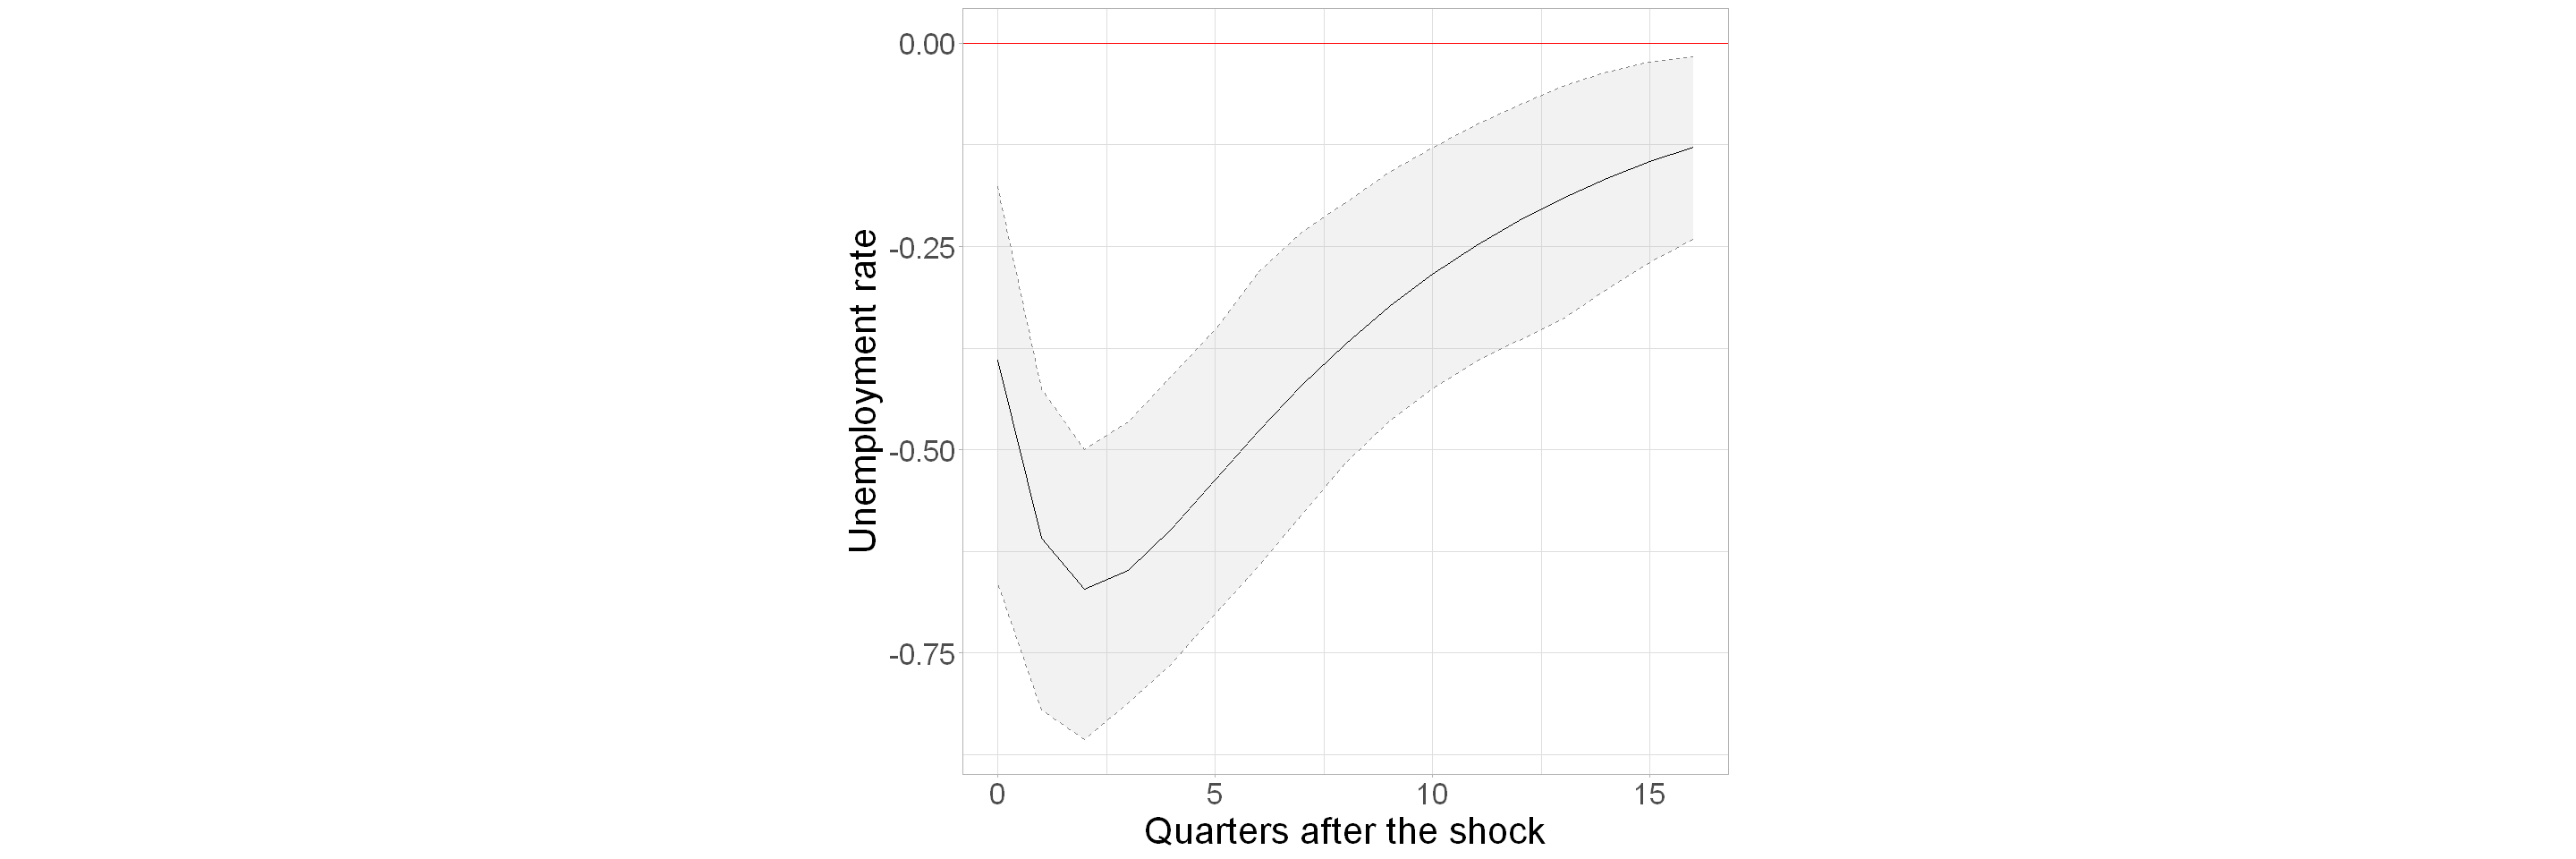

In [25]:
library(devtools)
source_url("https://raw.githubusercontent.com/anguyen1210/var-tools/master/R/extract_varirf.R");
library(dplyr)
temp = extract_varirf(irf.sys2.SVAR2)
temp %>%
  ggplot(aes(x=period, y=irf_dgdp_durate, ymin=lower_dgdp_durate, ymax=upper_dgdp_durate)) +
  geom_hline(yintercept = 0, color="red") +
  geom_ribbon(fill="grey", alpha=.2, color="grey50", linetype="dashed") +
  geom_line() +
  theme_light() +
  theme(aspect.ratio=1) +
  theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) +
  theme(text=element_text(size=25)) +
  labs(x = "Quarters after the shock") +
  labs(y = "Unemployment rate")

In [18]:
# SVAR IRF: structural identification (A/B restrictions in sys3.SVAR3)
irf.sys3.SVAR3 = irf(
  sys3.SVAR3,
  impulse  = "dgdp",    # shock variable
  response = "durate",  # variable whose response we trace
  n.ahead  = 16,        # horizons
  boot     = TRUE,      # bootstrap CIs (irf/Lower/Upper)
  seed     = 123        # reproducible bands (used only when boot=TRUE)
)
head(irf.sys3.SVAR3$irf$dgdp)   # first horizons of durate to a structural dgdp shock


# VAR IRF: reduced-form with Cholesky orthogonalization
irf.sys3.VAR3 = irf(
  sys3.VAR3,
  impulse  = "dgdp",
  response = "durate",
  n.ahead  = 16,
  ortho    = TRUE,      # Cholesky; ordering in sys3.VAR3 matters
  boot     = FALSE,     # no CIs; 'seed' has no effect
  seed     = 123
)
head(irf.sys3.VAR3$irf$dgdp)    # first horizons under Cholesky ID

durate
-0.3875892
-0.5754136
-0.6402268
-0.6442955
-0.5833409
-0.5131715


durate
-0.4567854
-0.5532078
-0.5764883
-0.5663070
-0.5048055
-0.4412406


ℹ SHA-1 hash of file is "cb23ce6a462d73b67920ae56dc83c828d18fe7e4"


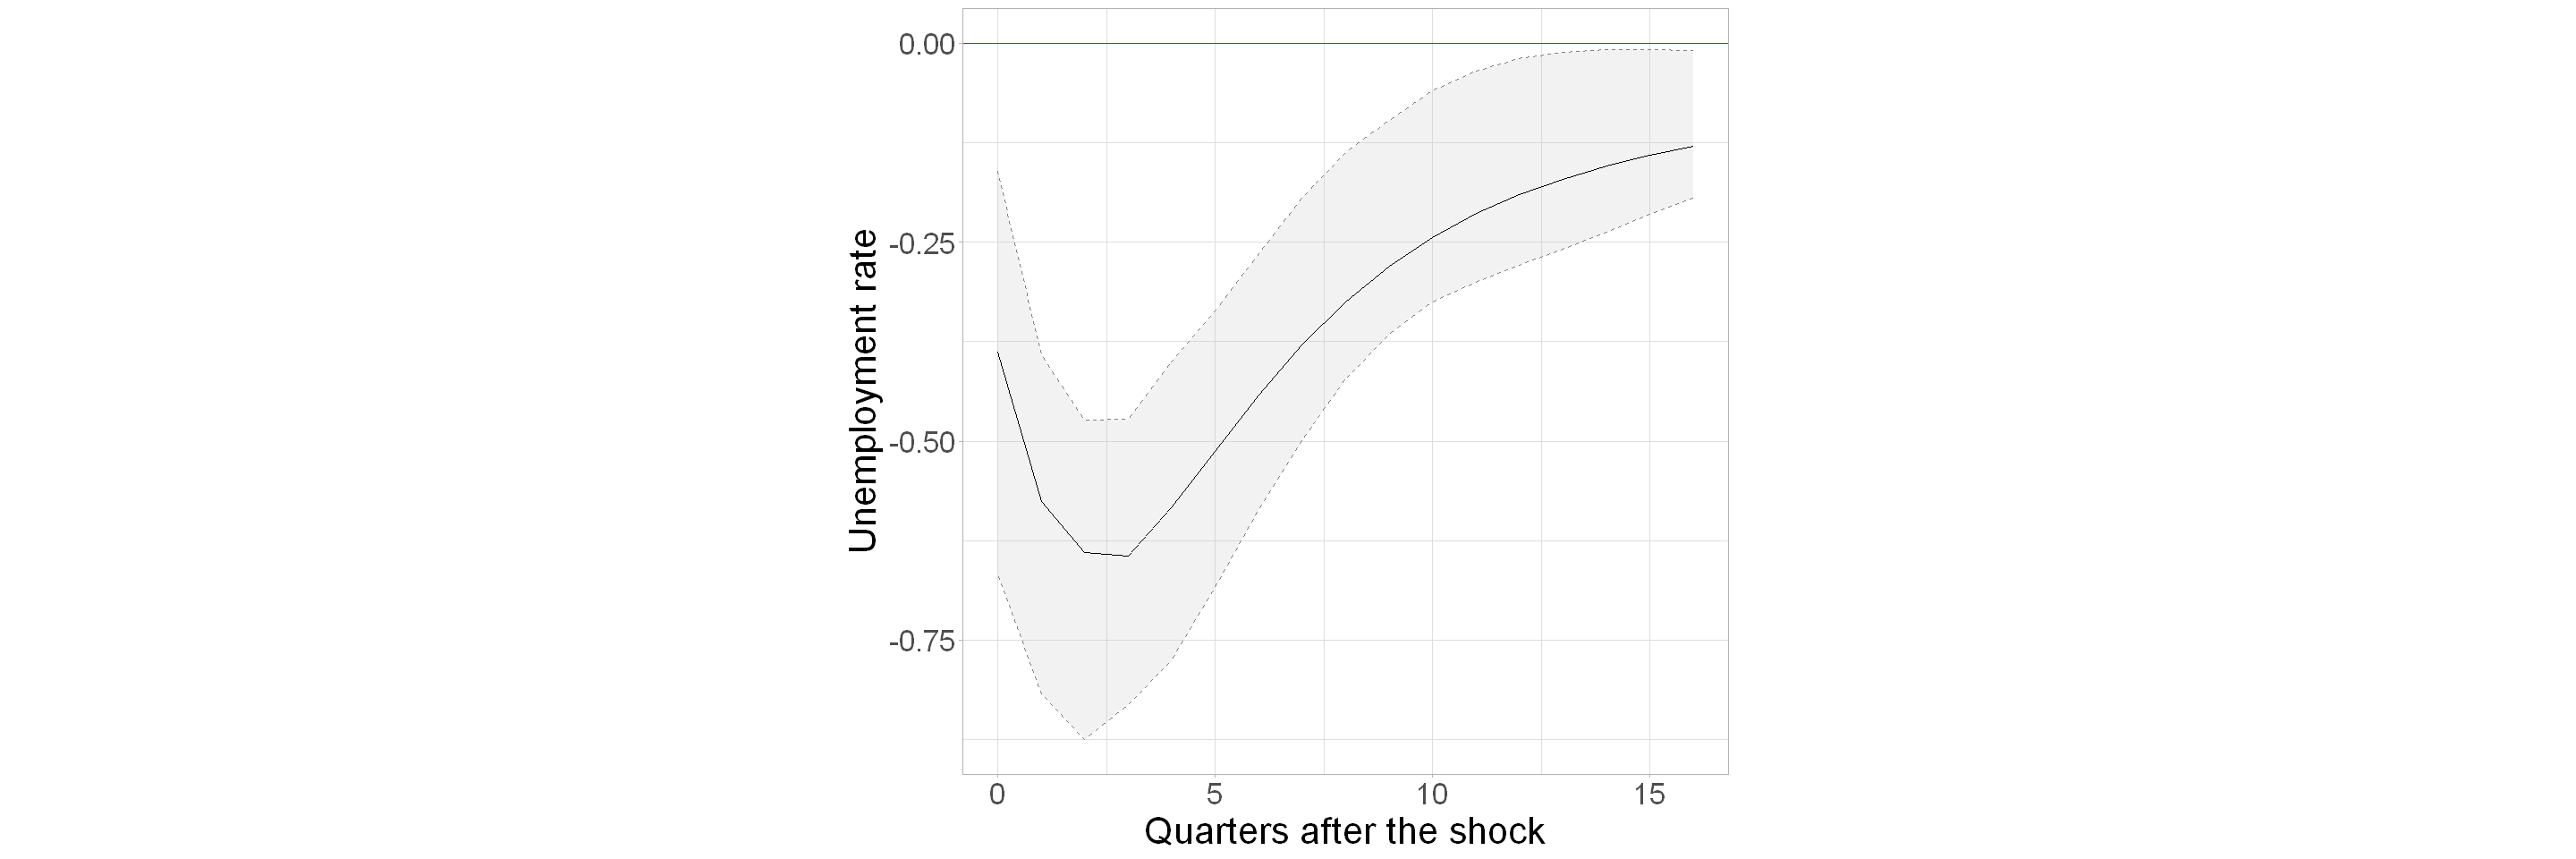

In [19]:
library(devtools)
source_url("https://raw.githubusercontent.com/anguyen1210/var-tools/master/R/extract_varirf.R");
library(dplyr)
temp = extract_varirf(irf.sys3.SVAR3)
temp %>%
  ggplot(aes(x=period, y=irf_dgdp_durate, ymin=lower_dgdp_durate, ymax=upper_dgdp_durate)) +
  geom_hline(yintercept = 0, color="red") +
  geom_ribbon(fill="grey", alpha=.2, color="grey50", linetype="dashed") +
  geom_line() +
  theme_light() +
  theme(aspect.ratio=1) +
  theme(plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm")) +
  theme(text=element_text(size=25)) +
  labs(x = "Quarters after the shock") +
  labs(y = "Unemployment rate")

<div style="background-color:lightyellow; padding:10px; border-radius:5px;">

<h2>Comparison: Unemployment response in 2-variable vs. 3-variable SVAR</h2>   
    
<b>Overall pattern</b><br>
Both figures show that the unemployment rate <b>declines following a positive structural GDP shock</b> and gradually returns to zero.<br>
The negative short-run effect and eventual mean reversion are consistent with <b>Okun’s law</b> and standard macroeconomic dynamics.

<h2>Similarities</h2>
<ul>
  <li><b>Direction of effect:</b><br>
  In both SVARs, a positive GDP-related structural shock leads to a <b>temporary drop in unemployment</b>, as higher output reduces joblessness.</li>

  <li><b>Timing:</b><br>
  The strongest effect occurs within the first few quarters, and the response <b>returns toward zero over roughly 12–16 quarters</b>.</li>

  <li><b>Identification:</b><br>
  Both models use the <b>same Cholesky decomposition</b> for structural identification, ensuring the shocks are comparable across specifications.</li>
</ul>

<h2>Differences</h2>
<ul>
  <li><b>Magnitude:</b><br>
  The <b>two-variable SVAR</b> produces a slightly <b>larger initial decline</b> in unemployment (≈ −0.6 to −0.8 p.p.),  
  while the <b>three-variable SVAR</b> shows a more moderate effect (≈ −0.5 p.p.).</li>

  <li><b>Persistence and statistical significance:</b><br>
  The <b>three-variable SVAR response becomes insignificant sooner</b> — the confidence band includes zero already around <b>6–8 quarters</b> —  
  whereas in the <b>two-variable SVAR</b>, the response remains <b>significant for longer</b> (roughly up to 10–12 quarters).  
  This suggests that including the third variable absorbs some of the variation previously attributed to GDP shocks, reducing the estimated persistence.</li>

  <li><b>Model dimensionality and precision:</b><br>
  Adding a third variable increases model complexity, leading to <b>wider confidence bands</b> and potentially less precise estimates for each impulse response.  
  The smaller model, by contrast, concentrates the dynamics in fewer equations, which can yield <b>sharper and longer-lasting responses</b>.</li>
</ul>

<h2>Interpretation</h2>
Both models tell a consistent story:<br>
a positive structural GDP shock temporarily lowers unemployment.<br><br>

However, the <b>two-variable SVAR</b> shows a <b>stronger and more persistent</b> response, while the <b>three-variable SVAR</b> yields a <b>smaller and less persistent</b> effect that becomes <b>insignificant sooner</b>.<br>
This pattern is typical when expanding a VAR system — additional variables can improve realism but may also <b>dilute and statistically weaken individual impulse responses</b>.

</div>
 

<div style="background-color:#e6f2ff; padding:10px; border-radius:5px;">

<h2>Forecasting VAR models</h2>
    
</div>    

In [20]:
# Generate forecasts from the VAR model
prd = predict(
  sys2.VAR2,   # the estimated VAR object
  n.ahead = 10, # number of steps ahead to forecast (here: 4 periods)
  ci = 0.95    # confidence interval level (95%)
)

# Display the forecast results
print(prd)

$dgdp
             fcst       lower      upper         CI
 [1,] 0.005269718 -0.01480743 0.02534686 0.02007715
 [2,] 0.006045592 -0.01543808 0.02752926 0.02148367
 [3,] 0.005728474 -0.01584857 0.02730552 0.02157705
 [4,] 0.005961434 -0.01568938 0.02761225 0.02165082
 [5,] 0.006090112 -0.01559972 0.02777995 0.02168984
 [6,] 0.006270006 -0.01547303 0.02801304 0.02174303
 [7,] 0.006426084 -0.01536283 0.02821500 0.02178892
 [8,] 0.006572835 -0.01525568 0.02840135 0.02182851
 [9,] 0.006702586 -0.01515763 0.02856280 0.02186021
[10,] 0.006817891 -0.01506734 0.02870312 0.02188523

$durate
          fcst    lower    upper       CI
 [1,] 4.340476 3.090252 5.590701 1.250225
 [2,] 4.477928 2.726271 6.229584 1.751656
 [3,] 4.620004 2.469140 6.770867 2.150863
 [4,] 4.749464 2.303854 7.195074 2.445610
 [5,] 4.866905 2.201724 7.532086 2.665181
 [6,] 4.971091 2.143337 7.798845 2.827754
 [7,] 5.063110 2.114350 8.011870 2.948760
 [8,] 5.143974 2.104809 8.183139 3.039165
 [9,] 5.214912 2.107884 8.321940 3.

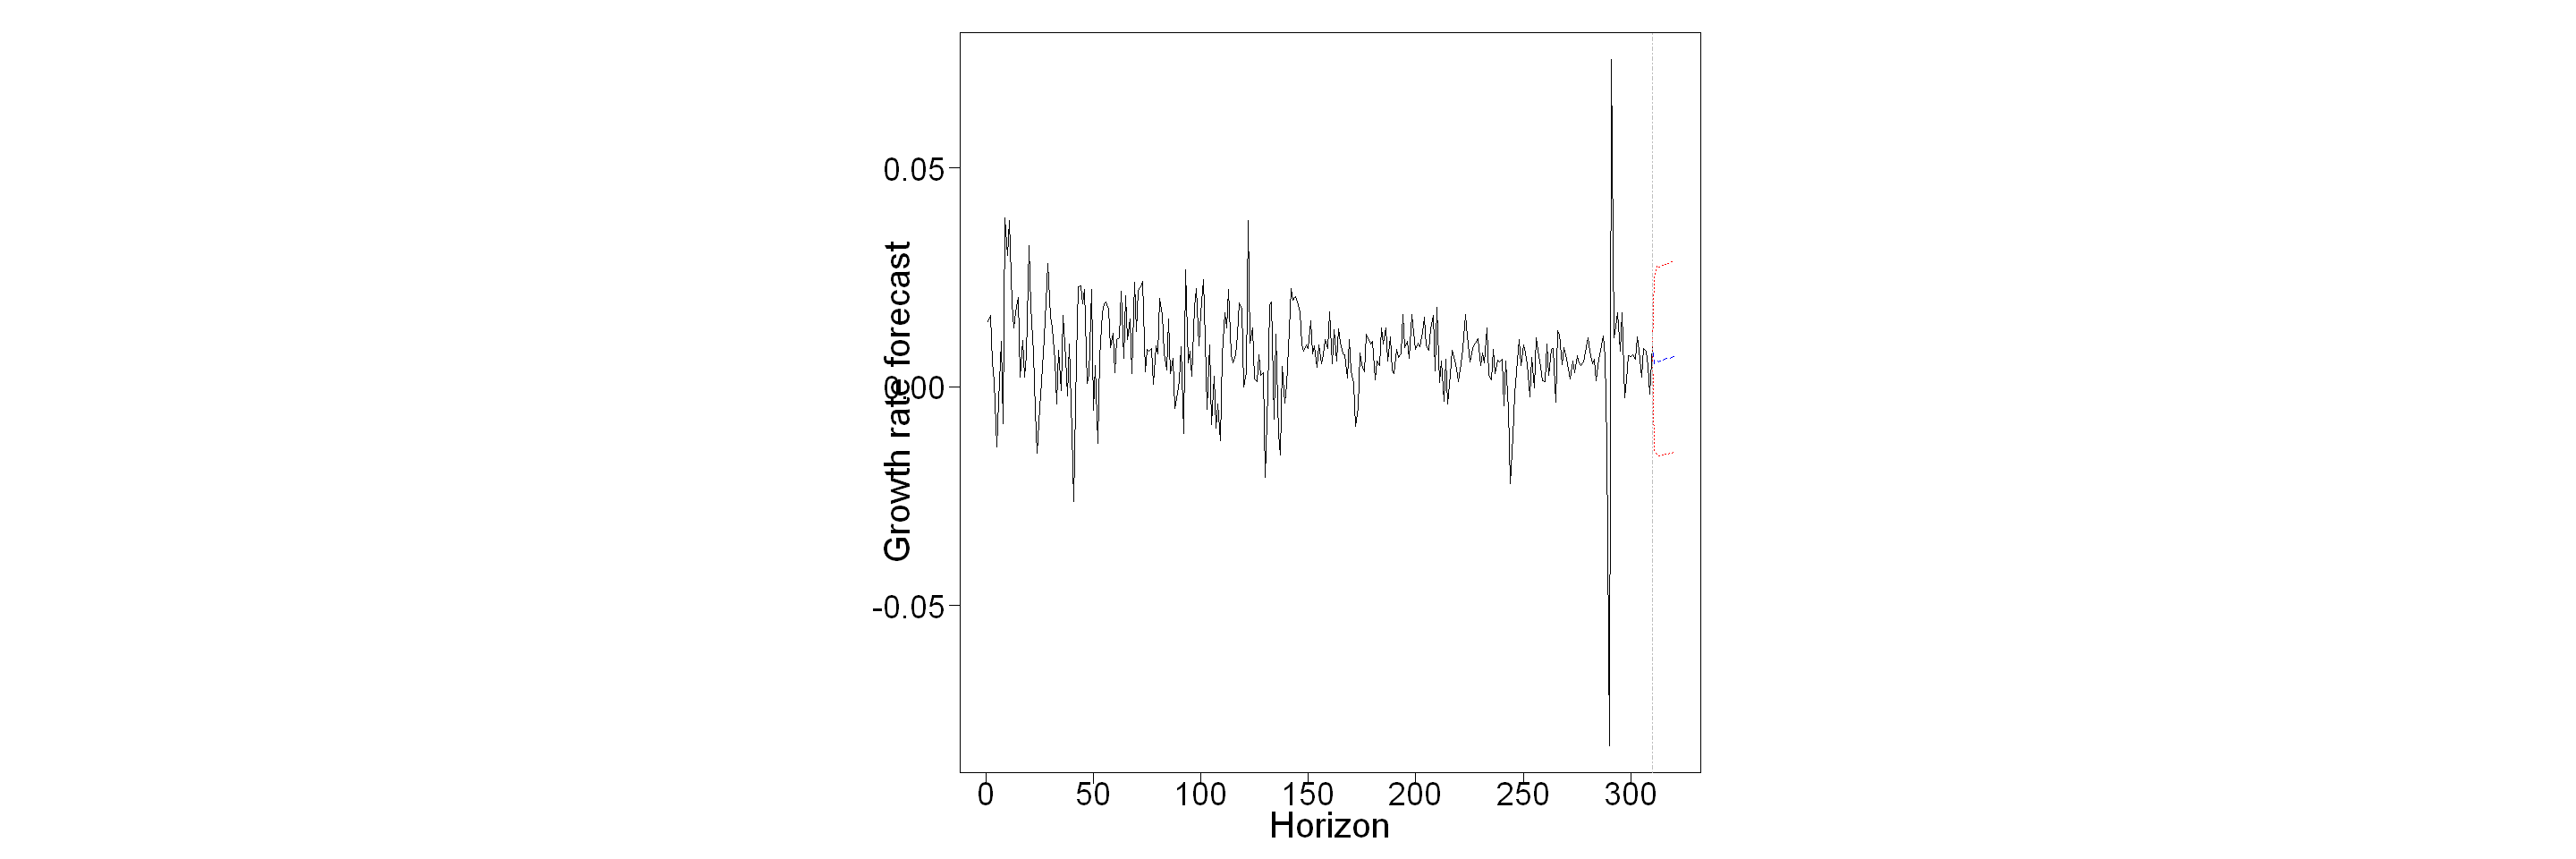

In [21]:
par(
  pty = "s",                 # square plotting region (aspect ratio ~ 1)
  cex.axis = 1.8,            # tick label size (1 = default)
  cex.lab  = 2.0,            # axis title size
  mgp = c(2.2, 0.7, 0),      # axis title, labels, line spacing
  las = 1,                   # horizontal y-axis labels
  mar = c(4, 5, 1.5, 1)     # margins: bottom, left, top, right
)

# Plot only the dgdp forecast, single panel, with your own labels
plot(
  prd,
  names     = "dgdp",        # only this variable
  plot.type = "single",      # single panel
  xlab      = "Horizon",
  ylab      = "Growth rate forecast",
  main      = ""             # remove default title
)

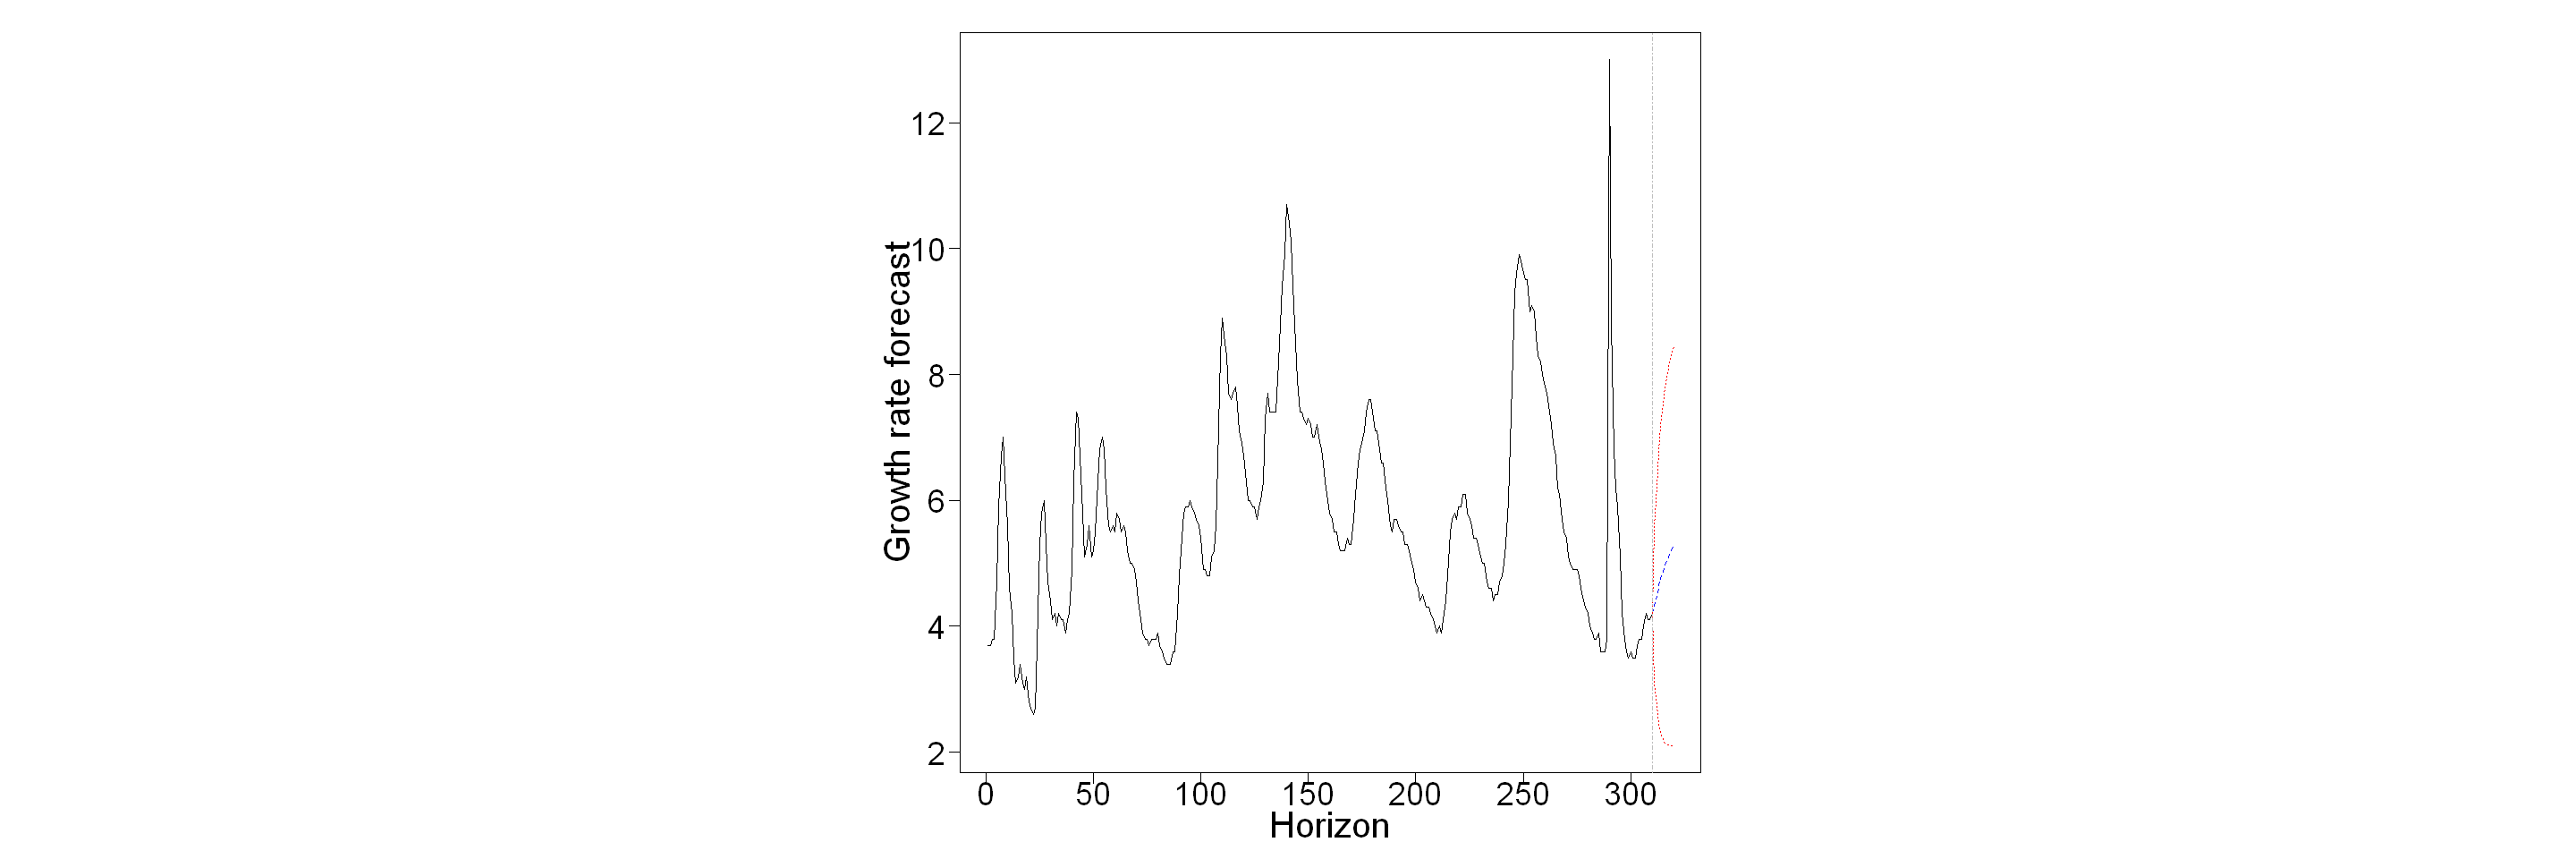

In [22]:
par(
  pty = "s",                 # square plotting region (aspect ratio ~ 1)
  cex.axis = 1.8,            # tick label size (1 = default)
  cex.lab  = 2.0,            # axis title size
  mgp = c(2.2, 0.7, 0),      # axis title, labels, line spacing
  las = 1,                   # horizontal y-axis labels
  mar = c(4, 5, 1.5, 1)      # margins: bottom, left, top, right
)

# Plot only the dgdp forecast, single panel, with your own labels
plot(
  prd,
  names     = "durate",      # only this variable
  plot.type = "single",      # single panel
  xlab      = "Horizon",
  ylab      = "Growth rate forecast",
  main      = ""             # remove default title
)